In [1]:
import numpy as np
import sklearn.datasets as sd
import matplotlib.pyplot as plt
import random

# logistic
X_train, y_train = sd.load_svmlight_file('a9a.txt',n_features = 123)
X_valid, y_valid = sd.load_svmlight_file('a9a.t.txt',n_features = 123)

X_train = X_train.toarray()#转化为矩阵
X_valid = X_valid.toarray()
y_train = y_train.reshape(len(y_train),1)#转为列向量
y_valid = y_valid.reshape(len(y_valid),1)

X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis = 1)#给x矩阵多增加1列1，拼接在每一行的末尾
X_valid = np.concatenate((np.ones((X_valid.shape[0],1)), X_valid), axis = 1)


In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(X, y ,theta):
    hx = sigmoid(X.dot(theta))
    cost = np.multiply(1+y, np.log(1+hx)) + np.multiply((1-y), np.log(1-hx))
    return -cost.mean()/2

def logistic_gradient(X, y, theta):
    return X.T.dot(sigmoid(X.dot(theta)) - y)

def logistic_score(X, y, theta):
    hx = sigmoid(X.dot(theta))
    hx[hx>=0.5] = 1
    hx[hx<0.5] = -1
    hx = (hx==y)
    return np.mean(hx)

def logistic_descent(X, y, theta, alpha, num_iters, batch_size, X_valid, y_valid):
    loss_train = np.zeros((num_iters,1))
    loss_valid = np.zeros((num_iters,1))
    data = np.concatenate((y, X), axis=1)
    for i in range(num_iters):
        sample = np.matrix(random.sample(data.tolist(), batch_size))
        grad = logistic_gradient(sample[:,1:125], sample[:,0], theta)#梯度
        theta = theta - alpha * grad#更新参数模型
        loss_train[i] = logistic_loss(X, y, theta)
        loss_valid[i] = logistic_loss(X_valid, y_valid, theta)
    return theta, loss_train, loss_valid

Now loss:  0.42859084152101384
logistic_score:  0.7637737239727289


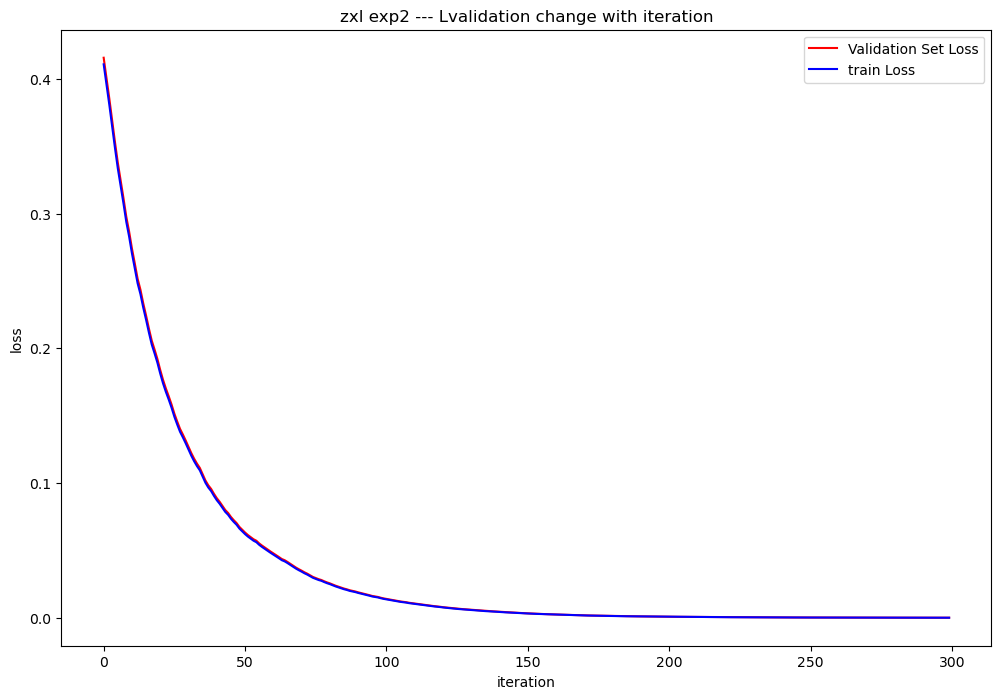

In [3]:
theta = np.zeros((X_train.shape[1],1))
print("Now loss: ",logistic_loss(X_train, y_train, theta))

theta = np.zeros((X_train.shape[1],1))
alpha = 0.0001
num_iters = 300
opt_theta, loss_train, Lvalidation = logistic_descent(X_train, y_train, theta, alpha, num_iters, 70, X_valid, y_valid)


print("logistic_score: ",logistic_score(X_valid, y_valid, opt_theta))

iteration = np.arange(0, num_iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('zxl exp2 --- Lvalidation change with iteration')
ax.set_xlabel('iteration')#横坐标
ax.set_ylabel('loss')#纵坐标
plt.plot(iteration, Lvalidation, 'r', label='Validation Set Loss')
plt.plot(iteration, loss_train, 'b', label='train Loss')
plt.legend()
plt.show()

In [4]:
# SVM
def hinge_loss(X, y, theta, t):
    loss = np.maximum(0, 1 - np.multiply(y, X.dot(theta))).mean()
    reg = np.multiply(theta,theta).sum() / 2
    return t * loss + reg

def hinge_gradient(X, y, theta, C):
    error = np.maximum(0, 1 - np.multiply(y, X.dot(theta)))
    index = np.where(error==0)
    x = X.copy()
    x[index,:] = 0
    grad = theta - C * x.T.dot(y) / len(y)
    grad[-1] = grad[-1] - theta[-1]
    return grad

def svm_descent(X, y, theta, alpha, num_iters, batch_size, X_valid, y_valid, C):
    loss_train = np.zeros((num_iters,1))
    loss_valid = np.zeros((num_iters,1))
    data = np.concatenate((y, X), axis=1)
    for i in range(num_iters):
        sample = np.matrix(random.sample(data.tolist(), batch_size))
        grad = hinge_gradient(sample[:,1:125], sample[:,0], theta, C)
        theta = theta - alpha * grad
        loss_train[i] = hinge_loss(X, y, theta, C)
        loss_valid[i] = hinge_loss(X_valid, y_valid, theta, C)
    return theta, loss_train, loss_valid

def svm_score(X, y, theta):
    hx = X.dot(theta)
    hx[hx>=5] = 1
    hx[hx<5] = -1
    hx = (hx==y)
    return np.mean(hx)


now loss:  21.114484130935917
svm_score 0.7637737239727289


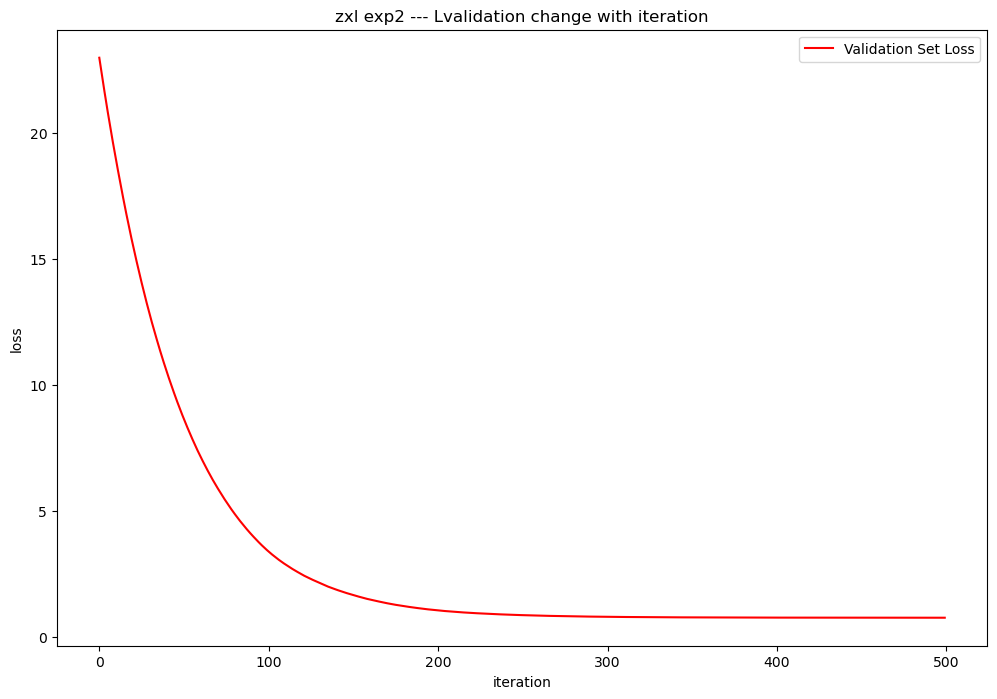

In [5]:
theta = np.random.random((X_train.shape[1],1))
C = 0.5
print("now loss: ",hinge_loss(X_train, y_train, theta, C))

theta = np.random.random((X_train.shape[1],1))
alpha = 0.01
num_iters = 500
opt_theta, loss_train, Lvalidation = svm_descent(X_train, y_train, theta, alpha, num_iters, 70, X_valid, y_valid, C)


print("svm_score",svm_score(X_valid, y_valid, opt_theta))

iteration = np.arange(0, num_iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('zxl exp2 --- Lvalidation change with iteration')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.plot(iteration, Lvalidation, 'r', label='Validation Set Loss')
plt.legend()
plt.show()